In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving 005380.KS.csv to 005380.KS.csv


In [60]:
import io
import pandas as pd
import numpy as np

dataset_train = pd.read_csv(io.BytesIO(uploaded['005380.KS.csv']))
df=dataset_train

In [4]:
testing_set = df.iloc[1473:,:]
training_set = df.iloc[:1473,:]


In [5]:
training_set.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,147500.0,148000.0,143500.0,144000.0,122929.078125,445332
1,2016-01-05,143000.0,145000.0,142000.0,143500.0,122502.265625,530496
2,2016-01-06,144000.0,145000.0,139000.0,140000.0,119514.414063,769406
3,2016-01-07,138500.0,140000.0,137500.0,137500.0,117380.226563,586187
4,2016-01-08,134500.0,138000.0,133500.0,136500.0,116526.539063,888701


In [6]:
training_set.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
1468,2021-12-24,210500.0,216500.0,210500.0,215500.0,211471.953125,1024355
1469,2021-12-27,216500.0,217000.0,213500.0,213500.0,209509.343750,530039
1470,2021-12-28,215000.0,215000.0,211500.0,214000.0,210000.000000,880326
1471,2021-12-29,213000.0,215000.0,211500.0,212000.0,212000.000000,659392
1472,2021-12-30,211500.0,212000.0,208500.0,209000.0,209000.000000,581448


In [7]:
testing_set.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
1473,2022-01-04,212500.0,212500.0,208500.0,210000.0,210000.0,499857
1474,2022-01-05,214000.0,217500.0,212000.0,213500.0,213500.0,1175411
1475,2022-01-06,210000.0,216500.0,210000.0,214000.0,214000.0,866582
1476,2022-01-07,214500.0,216500.0,213500.0,215000.0,215000.0,577852
1477,2022-01-10,214000.0,215000.0,209000.0,209500.0,209500.0,744261


In [8]:
training_set=training_set.iloc[:,2:3].values

In [9]:
testing_set=testing_set.iloc[:,2:3].values

In [11]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [12]:
X_train = []
y_train = []
for i in range(60, 1473):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [13]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [15]:
regressor = Sequential()

In [16]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [17]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [18]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [19]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [20]:
regressor.add(Dense(units = 1))

In [21]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [22]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
45/45 [==============================] - 12s 114ms/step - loss: 0.0217
Epoch 2/100
45/45 [==============================] - 6s 138ms/step - loss: 0.0049
Epoch 3/100
45/45 [==============================] - 8s 187ms/step - loss: 0.0044
Epoch 4/100
45/45 [==============================] - 5s 115ms/step - loss: 0.0037
Epoch 5/100
45/45 [==============================] - 5s 114ms/step - loss: 0.0037
Epoch 6/100
45/45 [==============================] - 5s 113ms/step - loss: 0.0043
Epoch 7/100
45/45 [==============================] - 5s 113ms/step - loss: 0.0037
Epoch 8/100
45/45 [==============================] - 5s 113ms/step - loss: 0.0032
Epoch 9/100
45/45 [==============================] - 5s 112ms/step - loss: 0.0031
Epoch 10/100
45/45 [==============================] - 5s 112ms/step - loss: 0.0029
Epoch 11/100
45/45 [==============================] - 5s 112ms/step - loss: 0.0029
Epoch 12/100
45/45 [==============================] - 5s 114ms/step - loss: 0.0027
Epoch 13/100

In [96]:
testing_set = df.iloc[1473:,:]
training_set = df.iloc[:1473,:]

In [97]:
dataset_test=testing_set

In [98]:
dataset_train= training_set

In [99]:
dataset_train['Open'].tail(5)

1468    210500.0
1469    216500.0
1470    215000.0
1471    213000.0
1472    211500.0
Name: Open, dtype: float64

In [100]:
dataset_test['Open'].head(5)

1473    212500.0
1474    214000.0
1475    210000.0
1476    214500.0
1477    214000.0
Name: Open, dtype: float64

In [101]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [102]:
X_test = []
for i in range(60, 184):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [103]:
X_test.shape

(124, 60, 1)

In [104]:
real_stock_price = dataset_test.iloc[:, 2:3].values

In [105]:
predicted_stock_price.shape

(124, 1)

In [106]:
real_stock_price.shape

(124, 1)

In [107]:
dataset_test=dataset_test.set_index('Date')

In [108]:
df2=dataset_test

In [109]:
df2['pred']=real_stock_price

In [111]:
df2=df2.reset_index()

In [112]:
df2['Date']=pd.to_datetime(df2['Date'],infer_datetime_format=True)

In [113]:
df2=df2.set_index('Date')

In [114]:
df2.head(5)

,Open,High,Low,Close,Adj Close,Volume,pred
Date,,,,,,,
2022-01-04,212500.0,212500.0,208500.0,210000.0,210000.0,499857,212500.0
2022-01-05,214000.0,217500.0,212000.0,213500.0,213500.0,1175411,217500.0
2022-01-06,210000.0,216500.0,210000.0,214000.0,214000.0,866582,216500.0
2022-01-07,214500.0,216500.0,213500.0,215000.0,215000.0,577852,216500.0
2022-01-10,214000.0,215000.0,209000.0,209500.0,209500.0,744261,215000.0


In [115]:
y_true=df2['Open']

In [116]:
y_pred=df2['pred']

In [117]:
y_true

Date
2022-01-04    212500.0
2022-01-05    214000.0
2022-01-06    210000.0
2022-01-07    214500.0
2022-01-10    214000.0
                ...   
2022-07-01    181500.0
2022-07-04    181000.0
2022-07-05    180000.0
2022-07-06    176000.0
2022-07-07    175000.0
Name: Open, Length: 124, dtype: float64

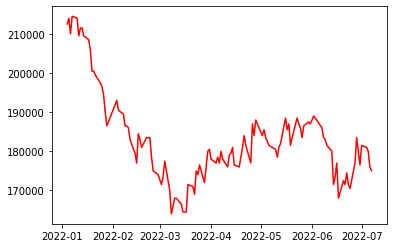

In [118]:
plt.plot(y_true, color = 'red', label = 'Real Google Stock Price')
plt.show()

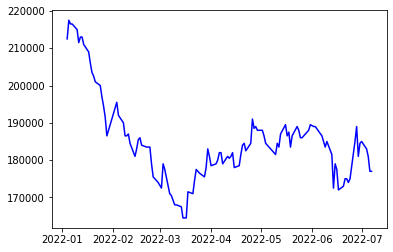

In [119]:
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.show()

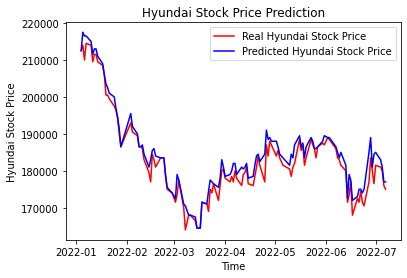

In [121]:
plt.plot(y_true, color = 'red', label = 'Real Hyundai Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Hyundai Stock Price')
plt.title('Hyundai Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Hyundai Stock Price')
plt.legend()
plt.show()